# Sınıflandırma Problemleri

In [4]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



OSError: dlopen(/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/lightgbm/lib/lib_lightgbm.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib
  Referenced from: <D44045CD-B874-3A27-9A61-F131D99AACE4> /Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/lightgbm/lib/lib_lightgbm.dylib
  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/local/lib/libomp/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/local/lib/libomp/libomp.dylib' (no such file)

# Lojistik Regresyon 

## Model 

In [6]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

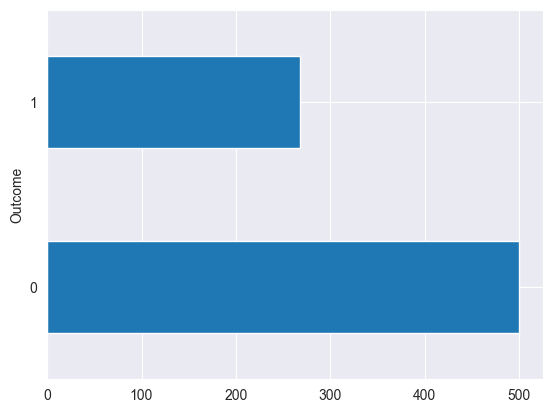

In [9]:
df["Outcome"].value_counts().plot.barh();

In [10]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [11]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [12]:
#statsmodels

In [13]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                 0.05922
Time:                        22:25:11   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [14]:
#scikit-learn

In [15]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [16]:
loj_model.intercept_

array([-5.89224552])

In [17]:
loj_model.coef_

array([[ 1.17046433e-01,  2.83909936e-02, -1.68877934e-02,
         7.60028703e-04, -6.42581842e-04,  5.97827092e-02,
         6.75480820e-01,  7.24727903e-03]])

## Tahmin & Model Tuning

In [18]:
y_pred = loj_model.predict(X)

In [19]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]])

In [20]:
accuracy_score(y, y_pred)

0.7747395833333334

In [21]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [22]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [23]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.35042549, 0.64957451],
       [0.91702069, 0.08297931],
       [0.22484841, 0.77515159],
       [0.92136394, 0.07863606],
       [0.167737  , 0.832263  ],
       [0.79894722, 0.20105278],
       [0.88016696, 0.11983304],
       [0.27804131, 0.72195869],
       [0.32033966, 0.67966034],
       [0.92273945, 0.07726055]])

In [24]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [25]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [26]:
y_probs[0:10]

array([0.64957451, 0.08297931, 0.77515159, 0.07863606, 0.832263  ,
       0.20105278, 0.11983304, 0.72195869, 0.67966034, 0.07726055])

In [27]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [28]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [29]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]])

In [30]:
accuracy_score(y, y_pred)

0.7747395833333334

In [31]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [32]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64957451, 0.08297931, 0.77515159, 0.07863606, 0.832263  ])

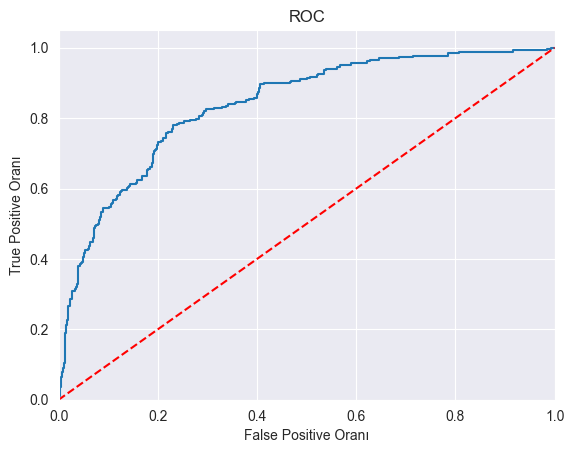

In [33]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [35]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [36]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [37]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7661231884057971

# Gaussian Naive Bayes

In [39]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [42]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [43]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [44]:
y_pred = nb_model.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [46]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN

## Model & Tahmin

In [47]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [48]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [49]:
y_pred = knn_model.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [52]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [53]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [54]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [55]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [56]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [57]:
y_pred = knn_tuned.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVC

## Model & Tahmin

In [59]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [60]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [61]:
svm_model

SVC(kernel='linear')

In [62]:
y_pred = svm_model.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [64]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ................................................C=1; total time=   1.0s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ................................................C=1; total time=   1.6s
[CV] END ................................................C=1; total time=   1.6s
[CV] END ................................................C=1; total time=   1.7s
[CV] END ................................................C=1; total time=   1.9s
[CV] END ................................................C=1; total time=   1.9s
[CV] END ................................................C=1; total time=   2.0s
[CV] END ................................................C=1; total time=   2.0s
[CV] END ................................................C=1; total time=   3.5s
[CV] END ................................................C=2; total time=   2.2s
[CV] END .......................................

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [65]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [66]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [67]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC

## Model & Tahmin

In [68]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [69]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [70]:
svc_model

SVC()

In [71]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [72]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [73]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END ..............................C=0.0001, gamma=0.001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END ..............................C=0.000

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [74]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [75]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [76]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Yapay Sinir Ağları

## Model & Tahmin

In [77]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [78]:
from sklearn.preprocessing import StandardScaler  

In [79]:
scaler = StandardScaler()

In [80]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [82]:
from sklearn.neural_network import MLPClassifier

In [83]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [84]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

## Model Tuning

In [85]:
mlpc

MLPClassifier()

In [86]:
?mlpc

In [87]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [88]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam;

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 i

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 i

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activatio

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.1, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 i

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END acti

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.01

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 i

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidd

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time= 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, a

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 1

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, al

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.005

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.7s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.9s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.0s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.7s
[C

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=rel

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, al

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hid

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total t

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 i

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 1

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=1e-05

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_lay

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam;

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activ

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), so

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alph

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END acti

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=logis

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total tim

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 i

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; t

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), sol

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100)

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 i

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=  

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 i

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 i

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.8s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logist

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), so

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; t

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 i

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), so

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=l

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.0s
[CV] END activation=logi

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END acti

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.1s
[CV] END activation=logisti

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.7s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.8s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alp

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ 

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam;

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), so

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [89]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}


In [90]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [91]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [92]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7402597402597403

# CART

## Model & Tahmin

In [93]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [96]:
cart_model

DecisionTreeClassifier()

In [97]:
#!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

ModuleNotFoundError: No module named 'astor'

In [98]:
x = [9]

In [99]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [100]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7056277056277056

## Model Tuning

In [101]:
cart_model

DecisionTreeClassifier()

In [102]:
?cart_model

In [103]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [104]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min

In [105]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [106]:
#final

In [107]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [108]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [109]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [112]:
rf_model

RandomForestClassifier()

In [113]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [114]:
rf_model

RandomForestClassifier()

In [115]:
?rf_model

In [116]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [117]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [118]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; tota

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [119]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}


In [ ]:
#final

In [120]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [121]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [122]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

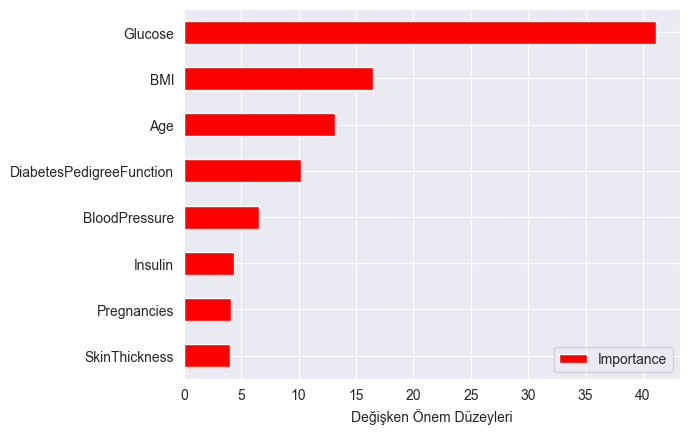

In [123]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [124]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [130]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [131]:
gbm_model

GradientBoostingClassifier()

In [132]:
?gbm_model

In [133]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [134]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [135]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.0

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [136]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [137]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [138]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [139]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# XGBoost

In [141]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [142]:
#!pip install xgboost
from xgboost import XGBClassifier

In [143]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [144]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [145]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [146]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [147]:
?xgb_model

In [148]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [149]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [150]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsampl

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsampl

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:56] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, sub

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsamp

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsampl

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:57] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:58] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsam

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:36:59] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subs

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subs

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsam

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsa

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsa

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsa

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:01] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimator

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:03] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subs

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, su

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subs

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:04] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, su

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:05] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsa

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, sub

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsamp

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, su

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:07] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimator

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, su

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:08] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subs

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsa

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, sub

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subs

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsa

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:10] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, sub

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, s

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:12] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=20

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=200

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:13] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=10

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=50

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=50

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:15] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:16] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:17] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimator

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimator

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:18] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=10

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:19] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:20] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_est

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:22] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=10

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:23] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=50

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:24] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=10

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:25] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=50

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:26] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:28] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:30] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_est

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:31] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:33] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=200

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:35] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:36] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:37] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estim

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:39] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimator

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=200

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:40] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:41] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_es

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:42] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimator

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:43] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:44] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:45] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:46] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estim

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_e

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estim

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:48] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:49] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimator

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=20

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=200

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:50] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:51] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:52] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_est

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_e

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:53] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_e

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=10

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimator

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:55] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=50

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:57] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:58] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:37:59] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_e

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:00] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:01] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimator

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=200

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:02] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=10

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=20

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:03] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:04] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:05] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=50

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimator

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:06] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:08] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:09] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:10] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:11] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:12] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_esti

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:13] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=50

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:14] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimato

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:15] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=20

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=50

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=50

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=10

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:17] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:19] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estim

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:20] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=10

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:21] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=200

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=5

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500,

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=10

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:22] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:23] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimat

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estima

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_es

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:25] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, 

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:26] WARNING: /Users/runner/

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.2s


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [151]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [152]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [153]:
xgb_tuned =  xgb.fit(X_train,y_train)

/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/xgboost/core.py:160: UserWarning: [00:38:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [154]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# CatBoost

## Model & Tahmin

In [159]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [161]:
#!pip install catboost
from catboost import CatBoostClassifier

In [162]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879743	total: 57.3ms	remaining: 57.3s
1:	learn: 0.6843415	total: 57.9ms	remaining: 28.9s
2:	learn: 0.6805762	total: 58.5ms	remaining: 19.4s
3:	learn: 0.6765783	total: 59ms	remaining: 14.7s
4:	learn: 0.6720830	total: 59.5ms	remaining: 11.8s
5:	learn: 0.6681617	total: 60ms	remaining: 9.94s
6:	learn: 0.6641913	total: 60.5ms	remaining: 8.58s
7:	learn: 0.6602881	total: 60.9ms	remaining: 7.56s
8:	learn: 0.6562625	total: 61.4ms	remaining: 6.76s
9:	learn: 0.6528484	total: 61.9ms	remaining: 6.13s
10:	learn: 0.6487824	total: 62.3ms	remaining: 5.6s
11:	learn: 0.6454980	total: 62.8ms	remaining: 5.17s
12:	learn: 0.6418953	total: 63.3ms	remaining: 4.81s
13:	learn: 0.6374430	total: 63.8ms	remaining: 4.49s
14:	learn: 0.6339676	total: 64.3ms	remaining: 4.22s
15:	learn: 0.6304253	total: 64.8ms	remaining: 3.98s
16:	learn: 0.6266998	total: 65.3ms	remaining: 3.78s
17:	learn: 0.6237660	total: 65.7ms	remaining: 3.59s
18:	learn: 0.6204394	total: 66.2ms	remaining: 3.42s

In [163]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [164]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [165]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6685874	total: 54.2ms	remaining: 10.8s
0:	learn: 0.6874973	total: 53.9ms	remaining: 10.7s
1:	learn: 0.6488393	total: 54.5ms	remaining: 5.39s
1:	learn: 0.6829692	total: 54.2ms	remaining: 5.37s
2:	learn: 0.6797256	total: 54.5ms	remaining: 3.58s
2:	learn: 0.6370950	total: 54.9ms	remaining: 3.6s
3:	learn: 0.6264371	total: 55.2ms	remaining: 2.7s
3:	learn: 0.6761736	total: 55ms	remaining: 2.69s
4:	learn: 0.6101247	total: 55.4ms	remaining: 2.16s
5:	learn: 0.5965374	total: 55.7ms	remaining: 1.8s
4:	learn: 0.6716818	total: 55.4ms	remaining: 2.16s
6:	learn: 0.5856338	total: 56ms	remaining: 1.54s
5:	learn: 0.6674896	total: 55.9ms	remaining: 1.81s
7:	learn: 0.5743535	total: 56.3ms	remaining: 1.35s
8:	learn: 0.5650630	total: 56.6ms	remaining: 1.2s
6:	learn: 0.6625333	total: 56.3ms	remaining: 1.55s
9:	learn: 0.5596522	total: 56.9ms	remaining: 1.08s
7:	learn: 0.6580978	total: 56.7ms	remaining: 1.36s
10:	learn: 0.5533363	total: 5

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [166]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [167]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6616272	total: 1.21ms	remaining: 241ms
1:	learn: 0.6400321	total: 1.81ms	remaining: 179ms
2:	learn: 0.6218089	total: 2.24ms	remaining: 147ms
3:	learn: 0.6091426	total: 2.75ms	remaining: 135ms
4:	learn: 0.5937763	total: 3.26ms	remaining: 127ms
5:	learn: 0.5776944	total: 3.66ms	remaining: 118ms
6:	learn: 0.5640806	total: 4.11ms	remaining: 113ms
7:	learn: 0.5465024	total: 4.7ms	remaining: 113ms
8:	learn: 0.5342909	total: 5.14ms	remaining: 109ms
9:	learn: 0.5253110	total: 5.72ms	remaining: 109ms
10:	learn: 0.5152172	total: 6.17ms	remaining: 106ms
11:	learn: 0.5038768	total: 6.62ms	remaining: 104ms
12:	learn: 0.4940544	total: 7.2ms	remaining: 104ms
13:	learn: 0.4868879	total: 7.66ms	remaining: 102ms
14:	learn: 0.4799839	total: 8.05ms	remaining: 99.3ms
15:	learn: 0.4744068	total: 8.45ms	remaining: 97.1ms
16:	learn: 0.4684003	total: 8.93ms	remaining: 96.1ms
17:	learn: 0.4618849	total: 9.32ms	remaining: 94.3ms
18:	learn: 0.4560376	total: 9.74ms	remaining: 92.8ms
19:	learn: 0.452008

In [168]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# Tüm Modellerin Karşılaştırılması

In [169]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 34.6320%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 75.3247%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.8918%
----------------------------
CatBoostClassifier:
Accuracy: 74.4589%
----------------------------
XGBClassifier:
Accuracy: 75.3247%


/Users/batuhansisman/PycharmProjects/pythonProject/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
